# Dataset Information

[Data Link](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption)

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).

**Notes:**

  1. (globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

  2. The dataset contains some missing values in the measurements (nearly 1.25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

**Attribute Information:**

  1. date: Date in format dd/mm/yyyy
  2. time: time in format hh:mm:ss
  3. globalactivepower: household global minute-averaged active power (in kilowatt)
  4. globalreactivepower: household global minute-averaged reactive power (in kilowatt)
  5. voltage: minute-averaged voltage (in volt)
  6. global_intensity: household global minute-averaged current intensity (in ampere)
  7. submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
  8. submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
  9. submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Data Inspection

In [1]:
# import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# load the dataset
df = pd.read_csv("household_power_consumption.txt", delimiter= ";")

C:\Users\PC\AppData\Local\Temp\ipykernel_17124\4069853025.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", delimiter= ";")


In [3]:
# display the first 5 rows
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# display the number of rows and columns
df.shape

(2075259, 9)

In [5]:
# check if there is any null values
df.isna().values.any()

True

In [6]:
# check for columns with the null values and the actual number of the values
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
# check if there is any duplicate rows in the dataset
df.duplicated().sum()

0

In [8]:
# check for the datatype of each column
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
# convert the `Date` column to datetime64 datatype 
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\PC\AppData\Local\Temp\ipykernel_17124\2394721818.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
# df['Time'] = pd.to_datetime(df['Time'])

In [11]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Data Cleaning and Preprocessing

In [12]:
# convert all the numeric columns to float datatype  
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors= 'coerce')

In [13]:
# check for the datatype again to know if all the changes have been reflected
df.dtypes

Date                     datetime64[ns]
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [21]:
# set the `Date` column as index
df.set_index("Date", inplace= True)

In [22]:
# display the first five rows of the dataset
df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [23]:
# check if there is any null values again after the dtype conversion
df.isna().sum()

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [24]:
# fill the null values with backward interpolation
df_clean = df.interpolate(method= 'linear', limit_direction= 'backward')

C:\Users\PC\AppData\Local\Temp\ipykernel_17124\619184814.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df.interpolate(method= 'linear', limit_direction= 'backward')


In [25]:
# check if there's still any null values
df_clean.isna().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [26]:
# drop the `Time` column
df_clean = df_clean.drop('Time', axis= 1)

In [111]:
# display the correlation between one column against another
df_clean.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.245047,-0.395522,0.998887,0.483816,0.433892,0.639272
Global_reactive_power,0.245047,1.000000,-0.109030,0.264162,0.122743,0.139204,0.087743
Voltage,-0.395522,-0.109030,1.000000,-0.407198,-0.194100,-0.165348,-0.265510
Global_intensity,0.998887,0.264162,-0.407198,1.000000,0.488756,0.439713,0.627264
Sub_metering_1,0.483816,0.122743,-0.194100,0.488756,1.000000,0.055011,0.102704
Sub_metering_2,0.433892,0.139204,-0.165348,0.439713,0.055011,1.000000,0.080710
Sub_metering_3,0.639272,0.087743,-0.265510,0.627264,0.102704,0.080710,1.000000


In [27]:
# downsample the dataset on daily basis
df_daily = df_clean.resample("D").sum()

In [39]:
# reset the dataset index
df_daily.reset_index(inplace= True)

In [40]:
# check for the number rows again after the downsampling
df_daily.shape[0]

1442

In [42]:
# split the dataset into the training and the test sets
train_ratio = df_daily.shape[0] - 300
train_set = df_daily[:train_ratio] # x-300 where x is the number of samples
test_set = df_daily[train_ratio:]  # last 300

In [43]:
# check for the training and the test sets number of rows
print(f"Training set is {train_set.shape[0]} samples")
print(f"Test set is {test_set.shape[0]} samples")

Training set is 1142 samples
Test set is 300 samples


# Model Training

In [120]:
from prophet import Prophet

train_set = train_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})
test_set = test_set.rename(columns= {'Date' : 'ds', 'Global_active_power' : 'y'})

model = Prophet()
model.fit(train_set[['ds', 'y']])
forecast = model.predict(test_set[['ds', 'y']])
forecast.head()

18:41:04 - cmdstanpy - INFO - Chain [1] start processing
18:41:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,1528.394841,1894.705751,3030.178852,1528.394841,1528.394841,911.521718,911.521718,911.521718,217.316889,217.316889,217.316889,694.204829,694.204829,694.204829,0.0,0.0,0.0,2439.916559
1,2010-02-01,1528.341973,1493.934274,2615.114108,1528.341973,1528.341973,529.856456,529.856456,529.856456,-161.644515,-161.644515,-161.644515,691.500971,691.500971,691.500971,0.0,0.0,0.0,2058.198428
2,2010-02-02,1528.289104,1597.426049,2734.282315,1528.289104,1528.289104,662.486895,662.486895,662.486895,-21.921704,-21.921704,-21.921704,684.408599,684.408599,684.408599,0.0,0.0,0.0,2190.775999
3,2010-02-03,1528.236236,1642.035240,2746.777608,1528.236236,1528.236236,657.367287,657.367287,657.367287,-15.406064,-15.406064,-15.406064,672.773351,672.773351,672.773351,0.0,0.0,0.0,2185.603523
4,2010-02-04,1528.183367,1474.801197,2580.967397,1528.183367,1528.183367,476.632783,476.632783,476.632783,-179.902379,-179.902379,-179.902379,656.535162,656.535162,656.535162,0.0,0.0,0.0,2004.816150


In [118]:
# import the necessary packages
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [129]:
# RMSE
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

29.67714684745038

In [ ]:
# MAPE
mean_absolute_percentage_error(test_set['y'], forecast['yhat']))

In [72]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-01-31,2439.916559,1863.517811,3003.705733,1528.394841,1528.394841,1528.394841
1,2010-02-01,2058.198428,1482.858729,2581.302610,1528.341973,1528.341973,1528.341973
2,2010-02-02,2190.775999,1641.685623,2717.258706,1528.289104,1528.289104,1528.289104
3,2010-02-03,2185.603523,1630.498116,2720.008126,1528.236236,1528.236236,1528.236236
4,2010-02-04,2004.816150,1468.225347,2558.355240,1528.183367,1528.183367,1528.183367
...,...,...,...,...,...,...,...
295,2010-11-22,1899.231277,1345.710825,2431.540150,1512.798618,1508.687392,1516.802454
296,2010-11-23,2044.656372,1493.769173,2612.529956,1512.745750,1508.608101,1516.765718
297,2010-11-24,2053.233766,1533.453389,2637.975357,1512.692881,1508.550583,1516.728982
298,2010-11-25,1887.403218,1316.628084,2434.971336,1512.640013,1508.475712,1516.692247


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


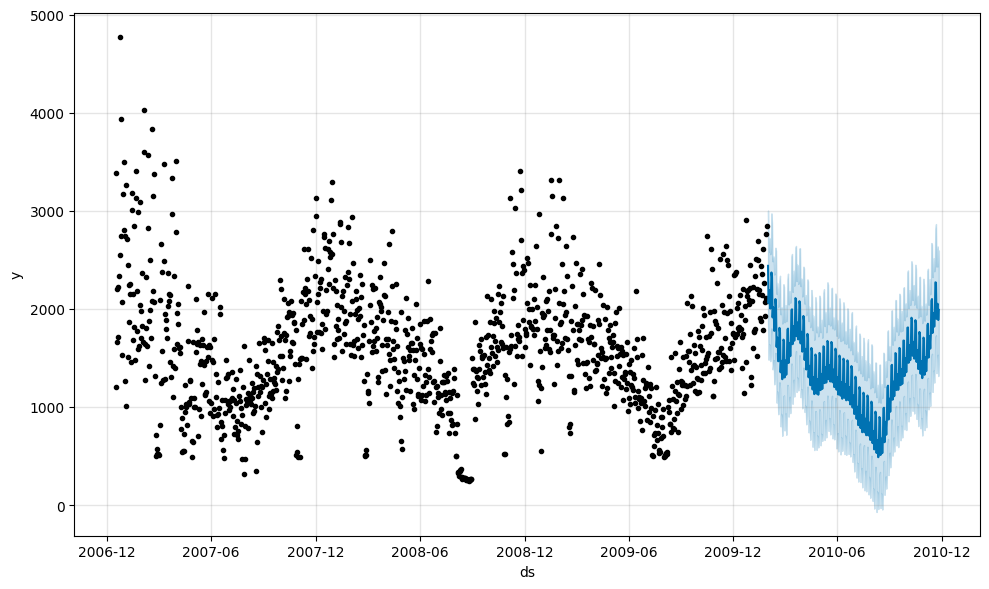

In [73]:
model.plot(forecast)
plt.show()

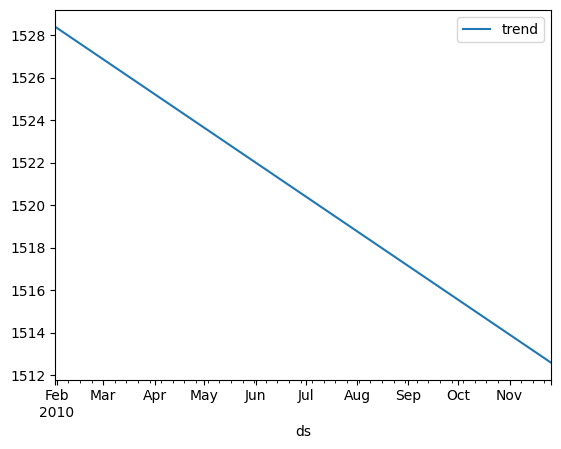

In [74]:
forecast.plot('ds', 'trend')
plt.show()

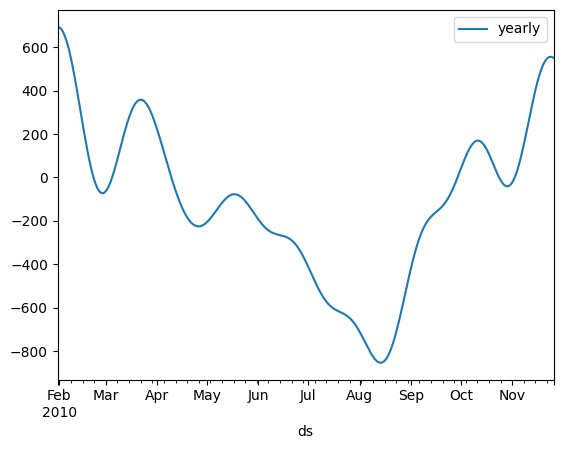

In [75]:
forecast.plot('ds', 'yearly')
plt.show()

In [76]:
old_columns = ['Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1','Sub_metering_2','Sub_metering_3']
new_columns = ['add1', 'add2', 'add3', 'add4', 'add5', 'add6']

train_set = train_set.rename(columns= dict(zip(old_columns, new_columns)))
test_set = test_set.rename(columns= dict(zip(old_columns, new_columns)))

In [124]:
model = Prophet()

In [125]:
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

In [126]:
model.fit(train_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])
forecast = model.predict(test_set[['ds', 'y', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']])

18:43:31 - cmdstanpy - INFO - Chain [1] start processing
18:43:31 - cmdstanpy - INFO - Chain [1] done processing


In [106]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-31,1617.707231,1790.976950,1824.821622,1617.707231,1617.707231,0.812432,0.812432,0.812432,1.154409,...,0.108579,0.108579,0.108579,9.890354,9.890354,9.890354,0.0,0.0,0.0,1808.482527
1,2010-02-01,1617.783569,1687.648032,1720.038837,1617.783569,1617.783569,9.352179,9.352179,9.352179,1.247357,...,-0.299609,-0.299609,-0.299609,10.416971,10.416971,10.416971,0.0,0.0,0.0,1703.354983
2,2010-02-02,1617.859907,2139.349507,2172.962254,1617.859907,1617.859907,8.185575,8.185575,8.185575,1.126082,...,-1.425090,-1.425090,-1.425090,10.966310,10.966310,10.966310,0.0,0.0,0.0,2156.092995
3,2010-02-03,1617.936245,2886.087101,2919.963668,1617.936245,1617.936245,-1.412595,-1.412595,-1.412595,0.742795,...,1.150660,1.150660,1.150660,11.530541,11.530541,11.530541,0.0,0.0,0.0,2903.439113
4,2010-02-04,1618.012583,2310.786237,2344.000446,1618.012583,1618.012583,6.233925,6.233925,6.233925,0.626242,...,-0.338104,-0.338104,-0.338104,12.101900,12.101900,12.101900,0.0,0.0,0.0,2327.636572


In [107]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-01-31,1808.482527,1790.976950,1824.821622,1617.707231,1617.707231,1617.707231
1,2010-02-01,1703.354983,1687.648032,1720.038837,1617.783569,1617.783569,1617.783569
2,2010-02-02,2156.092995,2139.349507,2172.962254,1617.859907,1617.859907,1617.859907
3,2010-02-03,2903.439113,2886.087101,2919.963668,1617.936245,1617.936245,1617.936245
4,2010-02-04,2327.636572,2310.786237,2344.000446,1618.012583,1618.012583,1618.012583
...,...,...,...,...,...,...,...
295,2010-11-22,2098.618972,1898.990019,2298.264872,1640.226916,1445.436140,1837.778242
296,2010-11-23,1640.616115,1442.739691,1836.702477,1640.303254,1444.124700,1839.156861
297,2010-11-24,1847.753341,1645.153990,2048.485702,1640.379592,1442.622845,1840.492666
298,2010-11-25,1470.960574,1263.794697,1673.677992,1640.455930,1441.130181,1841.775020


C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


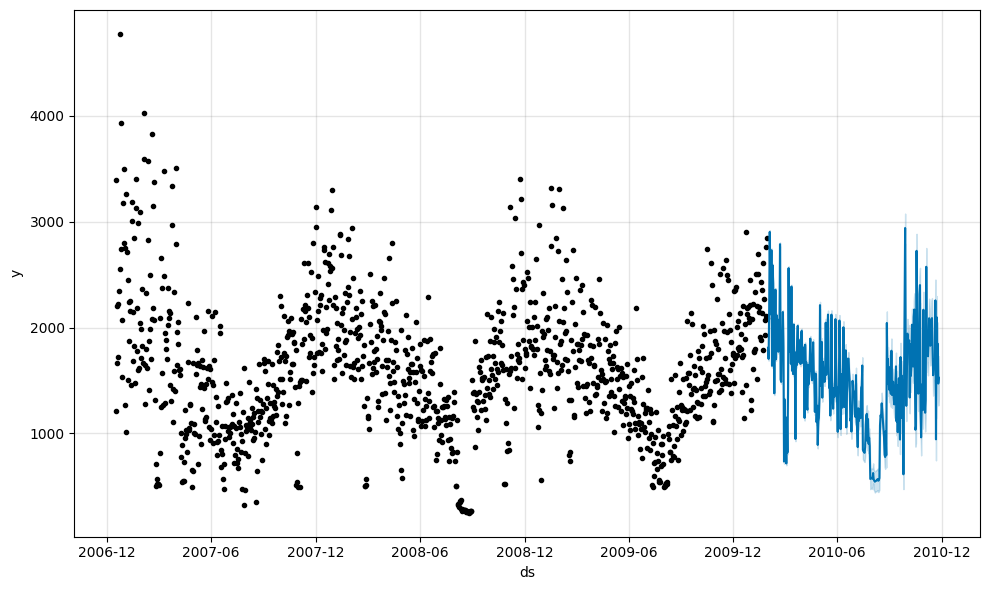

In [108]:
model.plot(forecast)
plt.show()

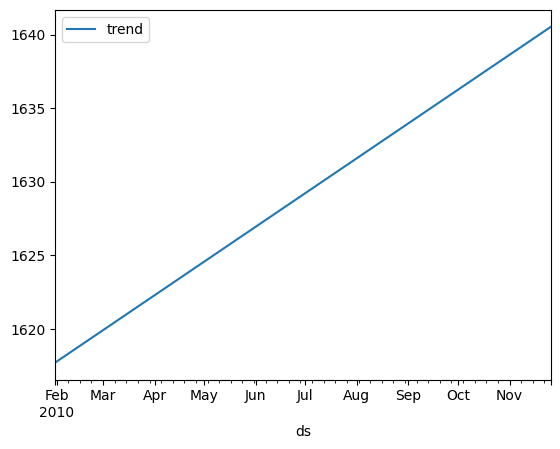

In [109]:
forecast.plot('ds', 'trend')
plt.show()

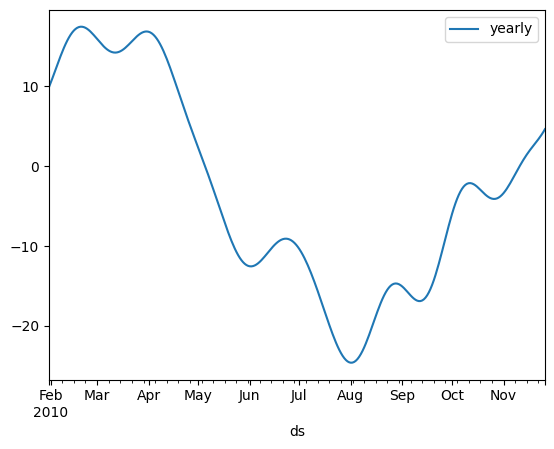

In [110]:
forecast.plot('ds', 'yearly')
plt.show()

In [ ]:
# RMSE
np.sqrt(mean_squared_error(test_set['y'], forecast['yhat']))

In [ ]:
# MAPE
mean_absolute_percentage_error(test_set['y'], forecast['yhat']))